In [1]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf

In [2]:
sample = pd.read_csv('../input/plant-pathology-2021-fgvc8/sample_submission.csv')
train = pd.read_csv('../input/plant-pathology-2021-fgvc8/train.csv')

In [4]:
print(train)

                      image                           labels
0      800113bb65efe69e.jpg                          healthy
1      8002cb321f8bfcdf.jpg  scab frog_eye_leaf_spot complex
2      80070f7fb5e2ccaa.jpg                             scab
3      80077517781fb94f.jpg                             scab
4      800cbf0ff87721f8.jpg                          complex
...                     ...                              ...
18627  fffb900a92289a33.jpg                          healthy
18628  fffc488fa4c0e80c.jpg                             scab
18629  fffc94e092a59086.jpg                             rust
18630  fffe105cf6808292.jpg          scab frog_eye_leaf_spot
18631  fffe472a0001bd25.jpg                          healthy

[18632 rows x 2 columns]


In [5]:
print(train.head(2))

                  image                           labels
0  800113bb65efe69e.jpg                          healthy
1  8002cb321f8bfcdf.jpg  scab frog_eye_leaf_spot complex


In [6]:
train.labels.unique()

array(['healthy', 'scab frog_eye_leaf_spot complex', 'scab', 'complex',
       'rust', 'frog_eye_leaf_spot', 'powdery_mildew',
       'scab frog_eye_leaf_spot', 'frog_eye_leaf_spot complex',
       'rust frog_eye_leaf_spot', 'powdery_mildew complex',
       'rust complex'], dtype=object)

healthy, sca, frog_eye_leaf_spot ,complex, rust, powdery_mildew 

In [7]:
print(len(train.labels.unique()))

12


In [8]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [9]:
im1 = cv2.imread('../input/plant-pathology-2021-fgvc8/train_images/800113bb65efe69e.jpg')
im2 = cv2.imread('../input/plant-pathology-2021-fgvc8/train_images/8002cb321f8bfcdf.jpg')
im3 = cv2.imread('../input/plant-pathology-2021-fgvc8/train_images/80070f7fb5e2ccaa.jpg')
im4 = cv2.imread('../input/plant-pathology-2021-fgvc8/train_images/800edef467d27c15.jpg')

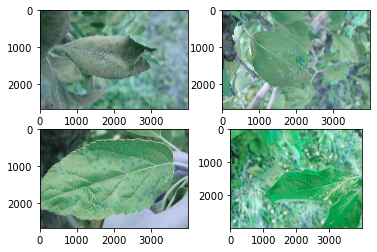

In [10]:
f, axes = plt.subplots(2,2)
axes[0][0].imshow(im1)
axes[0][1].imshow(im2)
axes[1][0].imshow(im3)
axes[1][1].imshow(im4)
plt.show()

In [11]:
import os

In [12]:
df = pd.read_csv('../input/plant-pathology-2021-fgvc8/train.csv', index_col='image')


In [13]:
df

,labels
image,
800113bb65efe69e.jpg,healthy
8002cb321f8bfcdf.jpg,scab frog_eye_leaf_spot complex
80070f7fb5e2ccaa.jpg,scab
80077517781fb94f.jpg,scab
800cbf0ff87721f8.jpg,complex
...,...
fffb900a92289a33.jpg,healthy
fffc488fa4c0e80c.jpg,scab
fffc94e092a59086.jpg,rust


In [14]:
df['labels'] = [x.split(' ') for x in df['labels']]

In [16]:
df

,labels
image,
800113bb65efe69e.jpg,[healthy]
8002cb321f8bfcdf.jpg,"[scab, frog_eye_leaf_spot, complex]"
80070f7fb5e2ccaa.jpg,[scab]
80077517781fb94f.jpg,[scab]
800cbf0ff87721f8.jpg,[complex]
...,...
fffb900a92289a33.jpg,[healthy]
fffc488fa4c0e80c.jpg,[scab]
fffc94e092a59086.jpg,[rust]


In [17]:
from sklearn.preprocessing import MultiLabelBinarizer

In [18]:
binarizer = MultiLabelBinarizer()

In [19]:
labels = binarizer.fit_transform(df['labels'].values)

In [20]:
labels

array([[0, 0, 1, 0, 0, 0],
       [1, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       ...,
       [0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0]])

In [21]:
df = pd.DataFrame(
    index=df.index,
    columns=binarizer.classes_,
    data=labels)

In [22]:
df

,complex,frog_eye_leaf_spot,healthy,powdery_mildew,rust,scab
image,,,,,,
800113bb65efe69e.jpg,0,0,1,0,0,0
8002cb321f8bfcdf.jpg,1,1,0,0,0,1
80070f7fb5e2ccaa.jpg,0,0,0,0,0,1
80077517781fb94f.jpg,0,0,0,0,0,1
800cbf0ff87721f8.jpg,1,0,0,0,0,0
...,...,...,...,...,...,...
fffb900a92289a33.jpg,0,0,1,0,0,0
fffc488fa4c0e80c.jpg,0,0,0,0,0,1
fffc94e092a59086.jpg,0,0,0,0,1,0


In [23]:
paths = ['../input/plant-pathology-2021-fgvc8/train_images/'+ path for path in os.listdir('../input/plant-pathology-2021-fgvc8/train_images')]

In [24]:
print(paths)

['../input/plant-pathology-2021-fgvc8/train_images/a8d54d0d96517ab3.jpg', '../input/plant-pathology-2021-fgvc8/train_images/ac6902fd1f0f3ce0.jpg', '../input/plant-pathology-2021-fgvc8/train_images/d4b7ea94e1c509e2.jpg', '../input/plant-pathology-2021-fgvc8/train_images/c780633f9d9d2970.jpg', '../input/plant-pathology-2021-fgvc8/train_images/a506c47f0f2d3d61.jpg', '../input/plant-pathology-2021-fgvc8/train_images/d4d8689596df6b80.jpg', '../input/plant-pathology-2021-fgvc8/train_images/edd8cfc45e503252.jpg', '../input/plant-pathology-2021-fgvc8/train_images/9ab326c1951acb7a.jpg', '../input/plant-pathology-2021-fgvc8/train_images/f728e036d729a0ad.jpg', '../input/plant-pathology-2021-fgvc8/train_images/fce318c6518fd20e.jpg', '../input/plant-pathology-2021-fgvc8/train_images/ab89d542c8cb2dc7.jpg', '../input/plant-pathology-2021-fgvc8/train_images/fd014f427ee2b807.jpg', '../input/plant-pathology-2021-fgvc8/train_images/908749cd1f2be553.jpg', '../input/plant-pathology-2021-fgvc8/train_images/

In [25]:
labels = [df.loc[f'{name}'] for name in os.listdir('../input/plant-pathology-2021-fgvc8/train_images')]

In [26]:
labels = np.array(labels)

In [27]:
print(labels)

[[0 0 0 0 0 1]
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]
 ...
 [1 1 0 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 1 0 0]]


In [ ]:
print(np.shape(labels))

In [28]:
print(len(paths))
print(np.shape(paths))

18632
(18632,)


In [32]:
#Computing power is too low
TOTAL_NUM = 18632
TRAIN_NUM = 17000
TEST_NUM = 1632

# TRAIN_NUM = 1000
# TEST_NUM = 100

In [31]:
train_img = np.float32(np.zeros((TRAIN_NUM,224,224,3)))
train_label = np.uint8(np.zeros((TRAIN_NUM,6)))

test_img = np.float32(np.zeros((TEST_NUM,224,224,3)))
test_label = np.uint8(np.zeros((TEST_NUM,6)))

In [ ]:
!nvidia-smi

In [33]:
print(paths)

['../input/plant-pathology-2021-fgvc8/train_images/a8d54d0d96517ab3.jpg', '../input/plant-pathology-2021-fgvc8/train_images/ac6902fd1f0f3ce0.jpg', '../input/plant-pathology-2021-fgvc8/train_images/d4b7ea94e1c509e2.jpg', '../input/plant-pathology-2021-fgvc8/train_images/c780633f9d9d2970.jpg', '../input/plant-pathology-2021-fgvc8/train_images/a506c47f0f2d3d61.jpg', '../input/plant-pathology-2021-fgvc8/train_images/d4d8689596df6b80.jpg', '../input/plant-pathology-2021-fgvc8/train_images/edd8cfc45e503252.jpg', '../input/plant-pathology-2021-fgvc8/train_images/9ab326c1951acb7a.jpg', '../input/plant-pathology-2021-fgvc8/train_images/f728e036d729a0ad.jpg', '../input/plant-pathology-2021-fgvc8/train_images/fce318c6518fd20e.jpg', '../input/plant-pathology-2021-fgvc8/train_images/ab89d542c8cb2dc7.jpg', '../input/plant-pathology-2021-fgvc8/train_images/fd014f427ee2b807.jpg', '../input/plant-pathology-2021-fgvc8/train_images/908749cd1f2be553.jpg', '../input/plant-pathology-2021-fgvc8/train_images/

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input

with tf.device('/gpu:0'):
    for idx,src in enumerate(paths):
        img = load_img(src,target_size = (224,224))
        x = img_to_array(img)
        x = np.expand_dims(x,axis =0)
        if idx < TRAIN_NUM:
            train_img[idx,:,:,:] = x
            train_label[idx] = labels[idx]
        else:
            if idx == TOTAL_NUM:
                break
            test_img[idx-TRAIN_NUM,:,:,:] = x
            test_label[idx-TRAIN_NUM] = labels[idx]

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# create a data generator

datagen = ImageDataGenerator(
        brightness_range = [0.7,1.3], 
        rotation_range=45,  # randomly rotate images in the range (degrees, 0 to 45)
        horizontal_flip=True,  # randomly flip images left and right
        vertical_flip=True)  # randomly flip images upside down

In [ ]:
img = load_img(paths[1])
data = img_to_array(img)
samples = np.expand_dims(data, 0)


it = datagen.flow(samples, batch_size=32)

fig = plt.figure(figsize = (10,10))

plt.subplot(3,3,1)
plt.imshow(img)

# 9개 이미지 생성
for i in range(8):
    plt.subplot(3, 3, i+2)
    batch = it.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)

# show the figure
plt.show()

In [ ]:
import keras

base_model = keras.applications.ResNet152(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3)
)

# Freeze the base layer
base_model.trainable = False

# Classifcation layer
x = keras.layers.GlobalAveragePooling2D()(base_model.output)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(2048,activation= 'relu')(x)
x = keras.layers.Dropout(0.5)(x)
predictions = keras.layers.Dense(6,activation = 'sigmoid')(x)


model = keras.models.Model(inputs = base_model.input,outputs =predictions)

model.compile(optimizer = keras.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics = ['accuracy',])

history = model.fit(datagen.flow(train_img,train_label,batch_size=32),
                    validation_data=datagen.flow(test_img,test_label,batch_size =32),
                    batch_size = 32,
                    epochs=10)

model.save("model_freeze.h5")
    

In [ ]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))


plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']

x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red')
plt.plot(x_len, y_acc, marker='.', c='blue')

plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
base_model.trainable = True

model.compile(optimizer = keras.optimizers.Adam(lr = 0.00001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy',])

history = model.fit(datagen.flow(train_img,train_label,batch_size=32),
                    validation_data=datagen.flow(test_img,test_label,batch_size =32),
                    batch_size = 32,
                    epochs=10)

model.save("model_unfreeze.h5")

In [ ]:
from keras.models import load_model
model_freeze = load_model('model_freeze.h5')

In [ ]:
paths[0]

In [ ]:
image_test = load_img(paths[0],target_size = (224,224))
x = img_to_array(image_test)
x = np.expand_dims(x,axis =0)

In [ ]:
paths[0]

In [ ]:
df.loc['a8d54d0d96517ab3.jpg']

In [ ]:
model.predict(x)

In [ ]:
model_freeze.predict(x)